# Hotel Booking Cancelaciones EDA y Predicción

#### Table of Contents

* [EDA](#2.0)
    * [¿De dónde proceden la mayoría de los huéspedes?](#2.1)
    * [¿Cuánto se paga por habitación por noche?](#2.2)
    * [¿Cómo varía el precio por noche durante el año?](#2.3)
    * [¿Cuáles son los meses de mayor ocupación?](#2.4)
    * [¿Cuánto dura la estancia en los hoteles?](#2.5)
    
* [Preprocesado de datos](#3.0)

* [Model Building](#4.0)
    * [Logistic Regression](#4.1)
    * [Knn](#4.2)
    * [Decision Tree Classifier](#4.3)
    * [Random Forest Classifier](#4.4)
    
* [Comparación de los modelos](#5.0)


**LightGBM (Light Gradient Boosting Machine)** es un framework de aprendizaje automático que se utiliza para construir
modelos de boosting de gradientes, los cuales son altamente eficientes y efectivos para tareas de clasificación, regresión y ranking. Es conocido por su velocidad y eficiencia, así como por su capacidad para manejar grandes volúmenes de datos.


In [ ]:
#Instalamos librerías
!pip install lightgbm

**Folium** es una biblioteca de Python que se utiliza para crear mapas interactivos. Con la ayuda de la biblioteca de mapeo leaflet.js, Folium facilita la visualización de datos manipulados en Python sobre un mapa interactivo. Permite la superposición de capas, la incorporación de marcadores, la adición de diferentes tipos de visualizaciones y más, lo que lo hace muy útil para proyectos de análisis de datos geoespaciales.

In [ ]:
#Instalamos librerías
!pip install folium

**missingno** proporciona un conjunto de herramientas de visualización flexibles y fáciles de usar para el análisis de completitud de datos, lo que te permite identificar rápidamente patrones de datos faltantes en tu conjunto de datos. Esto puede ser crucial para la limpieza de datos y el preprocesamiento antes de realizar cualquier análisis o modelado más detallado.

In [ ]:
#Instalamos librerías
!pip install missingno

In [ ]:
# importamos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Cargamos el Dataset

In [ ]:
# reading data
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Imprimimos los tipos de datos presentes en el dataset

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**El método .info() en Pandas se utiliza para obtener un resumen conciso de un DataFrame.**

Al ejecutar df.info() en un entorno de Jupyter Notebook obtenemos una salida que incluye información valiosa sobre el DataFrame. Esta información típicamente incluye:

Número de entradas y columnas: Muestra el total de filas y columnas en el DataFrame.

Tipo de cada columna: Informa sobre el tipo de datos (como float, integer, object, etc.) de cada columna en el DataFrame.

Cantidad de valores no nulos: Indica cuántos valores no nulos hay en cada columna. Esto es útil para identificar columnas con muchos valores faltantes.

Uso de memoria: Proporciona una estimación de la cantidad de memoria utilizada por el DataFrame.

Este método es particularmente útil para obtener una visión general rápida del DataFrame, especialmente en las etapas iniciales del análisis de datos, cuando estás familiarizándote con la estructura y el contenido de tus datos. Te ayuda a identificar problemas como columnas con muchos valores faltantes o columnas que podrían necesitar un cambio de tipo de dato para un análisis más eficiente.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Limpieza de datos

#### Eliminamos los duplicados si los hay

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#### Eliminamos los valores NaN del dataset

In [ ]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info() #.info() obtenemos un resumen conciso del dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           189 non-null    object 
 1   is_canceled                     189 non-null    int64  
 2   lead_time                       189 non-null    int64  
 3   arrival_date_year               189 non-null    int64  
 4   arrival_date_month              189 non-null    object 
 5   arrival_date_week_number        189 non-null    int64  
 6   arrival_date_day_of_month       189 non-null    int64  
 7   stays_in_weekend_nights         189 non-null    int64  
 8   stays_in_week_nights            189 non-null    int64  
 9   adults                          189 non-null    int64  
 10  children                        189 non-null    float64
 11  babies                          189 non-null    int64  
 12  meal                          

#### Comprobamos los valores nulos

In [ ]:
# comprobando valores nulos

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.0
is_canceled,0,0.0
lead_time,0,0.0
arrival_date_year,0,0.0
arrival_date_month,0,0.0
arrival_date_week_number,0,0.0
arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,0,0.0
stays_in_week_nights,0,0.0
adults,0,0.0


In [ ]:
# rellenando valores nulos con ceros

df.fillna(0, inplace = True)

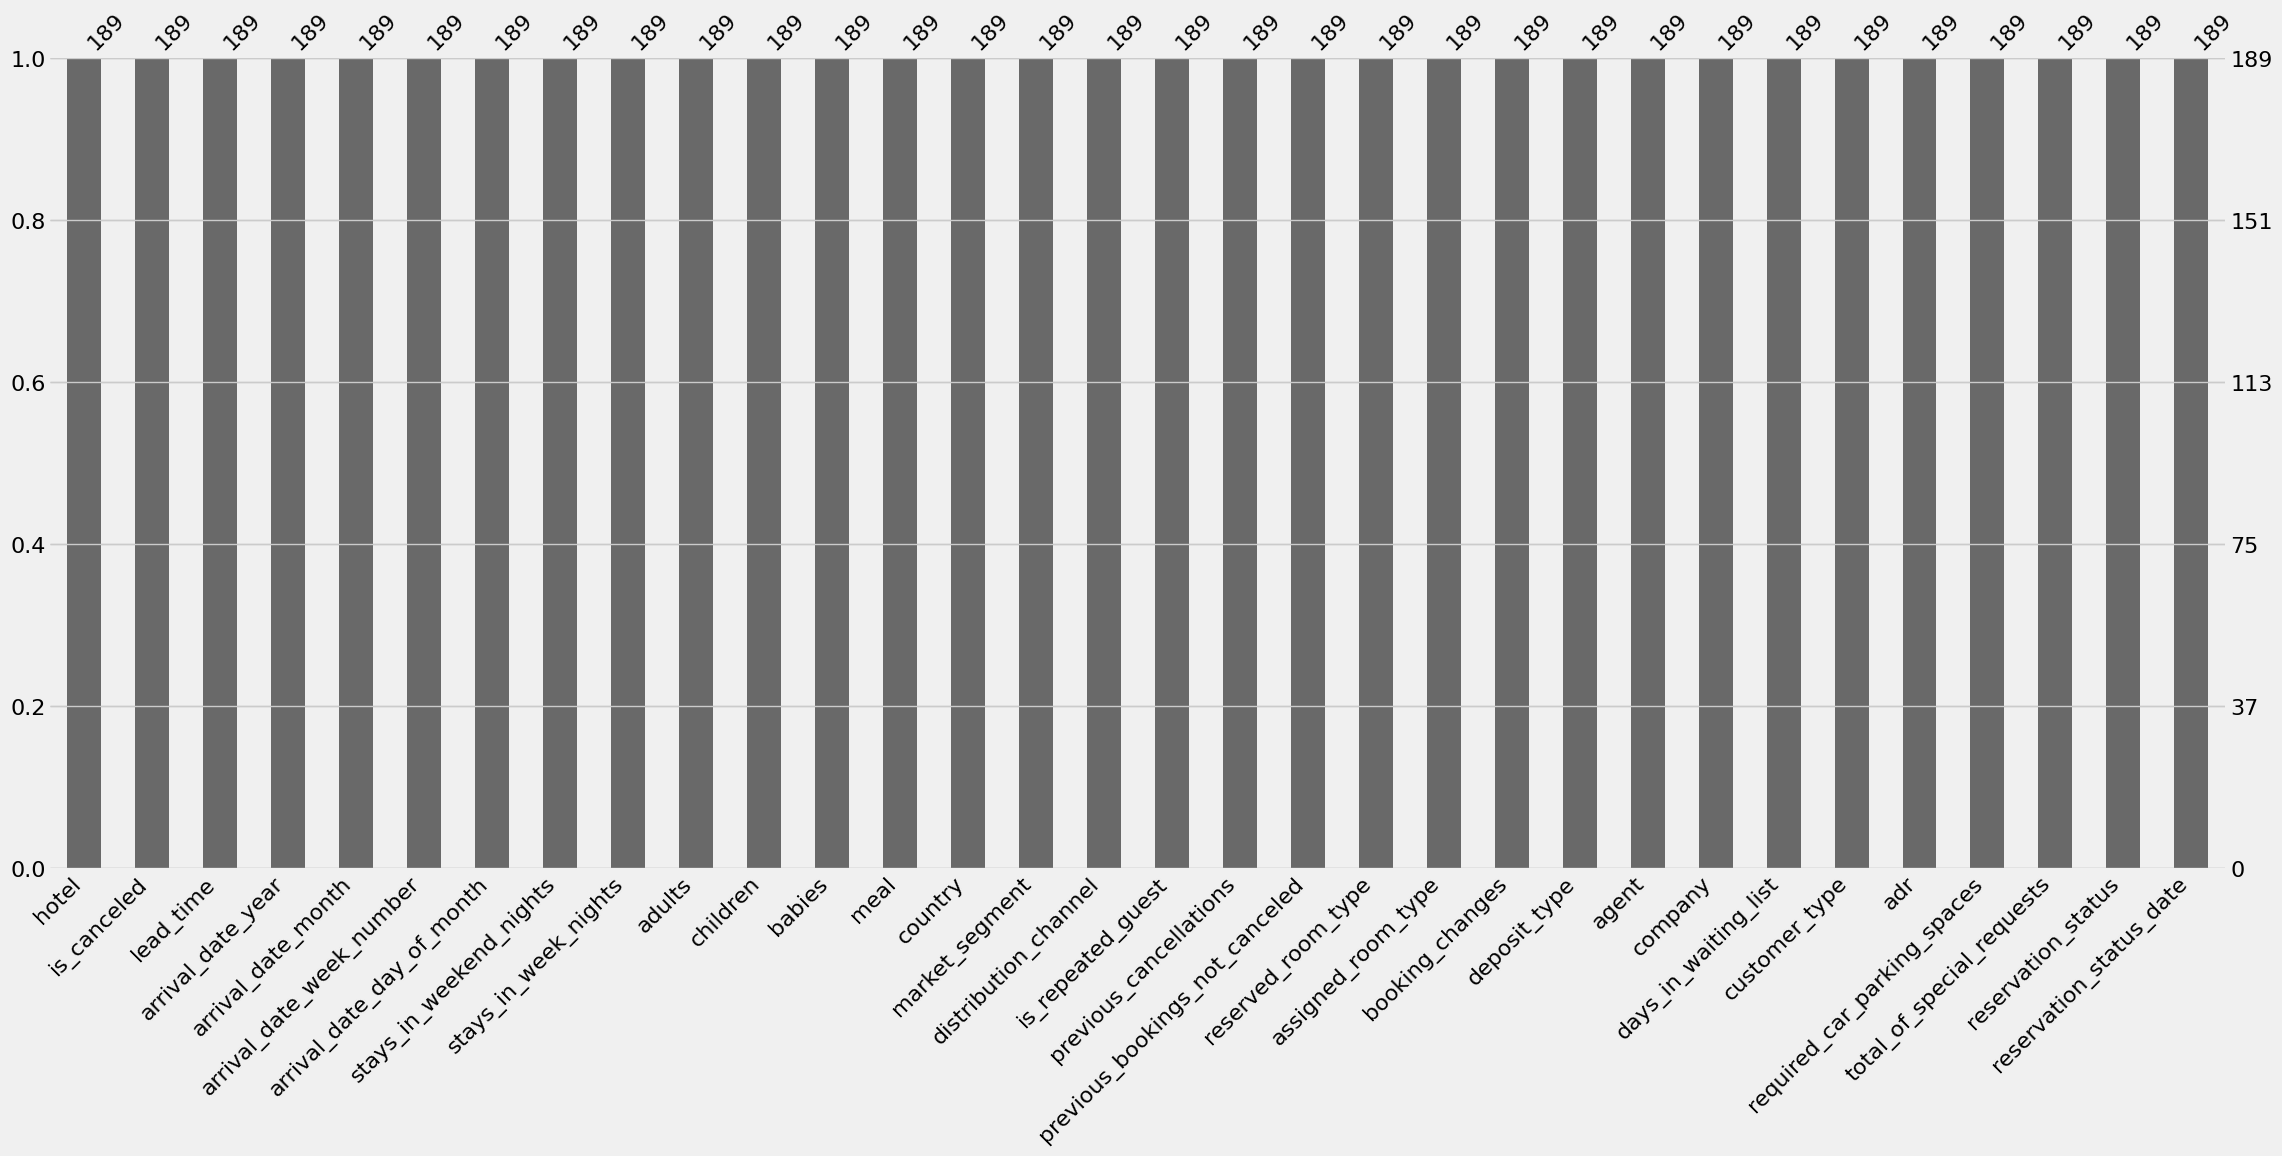

In [ ]:
# visualizamos valores nulos con la librería missigno
msno.bar(df)
plt.show()

In [ ]:
# adultos, bebés y niños no pueden estar a cero al mismo tiempo, así que eliminamos dichas filas

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
df = df[~filter] #el operador de negación invierte el filtro anterior y nos quedamos con las columnas donde hay adultos
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


### Examinamos las  Variables Continuas

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000
mean,0.084656,33.883598,2015.486772,37.555556,11.121693,1.439153,4.365079,1.423280,0.042328,0.0,0.079365,0.010582,0.169312,1.312169,207.306878,260.153439,0.0,64.804180,0.100529,0.222222
std,0.279109,50.797022,0.740963,13.317854,7.735728,1.481356,3.526352,0.526619,0.249055,0.0,0.271026,0.145479,0.766943,1.297670,109.707837,107.122781,0.0,40.186506,0.301503,0.577350
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2015.000000,33.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,24.000000,2015.000000,45.000000,9.000000,1.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.000000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


## Exploratory Data Analysis (EDA)

#### ¿De dónde proceden la mayoría de los huéspedes?

In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,62
1,AUT,23
2,FRA,20
3,GBR,19
4,ITA,14
5,ESP,8
6,DEU,7
7,CZE,4
8,BEL,3
9,MEX,2


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

Personas de todo el mundo se alojan en estos dos hoteles. La mayoría de los huéspedes son de Portugal y otros países de Europa.

### ¿Cuánto cuesta una habitación por noche?

In [ ]:
df.head(119000)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


**Precio de habitación por noche**



*adr (Average Daily Rate) es la tarifa diaria promedio*

In [ ]:
# Para seleccionar las columnas 'hotel' y 'adr', hacemos:
df_seleccionado = df[['hotel', 'adr']]

# Mostrando las primeras 119000 filas del DataFrame resultante
print(df_seleccionado.head(119000))

               hotel    adr
2392    Resort Hotel   82.0
2697    Resort Hotel   52.2
2867    Resort Hotel   48.0
2877    Resort Hotel   40.0
2878    Resort Hotel   48.0
...              ...    ...
112499    City Hotel  150.0
113046    City Hotel   95.0
113082    City Hotel  110.0
113627    City Hotel  135.0
116451    City Hotel  120.6

[189 rows x 2 columns]


**Ambos hoteles ofrecen varios tipos de habitaciones. Los factores estacionales afectan significativamente sus precios, lo que lleva a una considerable variabilidad.**

In [ ]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

**La figura muestra que el precio medio por habitación depende de su tipo y desviación estándar**

### Variación del precio durante el año

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,August,164.666667
1,December,37.333333
2,February,30.000000
3,January,46.178333
4,July,199.466667
5,June,91.765000
6,March,34.425000
7,May,74.875000
8,November,44.029490
9,October,54.385714


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,August,107.611111
1,December,86.680000
2,February,98.000000
3,January,90.166667
4,July,110.875000
5,June,135.000000
6,March,95.000000
7,May,106.111111
8,November,142.445000
9,October,67.166667


In [ ]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,August,164.666667,107.611111
1,December,37.333333,86.680000
2,February,30.000000,98.000000
3,January,46.178333,90.166667
4,July,199.466667,110.875000
5,June,91.765000,135.000000
6,March,34.425000,95.000000
7,May,74.875000,106.111111
8,November,44.029490,142.445000
9,October,54.385714,67.166667


*Ahora observamos aquí que la columna del mes no está en orden, y si visualizamos obtendremos conclusiones inadecuadas.*

*Entonces, primero tenemos que proporcionar la jerarquía correcta a la columna de mes.*

In [ ]:
#Este paquete es útil para ordenar dataframes de pandas basándose en columnas que contienen meses o semanas,
#de manera que el orden sea cronológico y no alfabético.

!pip install sort-dataframeby-monthorweek


#Este paquete es útil para ordenar los nombres de los meses o los días de la semana en un orden cronológico,
#lo cual es especialmente útil en análisis de datos y visualizaciones.

!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=fe7d18f21d64ab96cffc6967763fb9cd2213d80b0b97893c7c017e9f370928e9
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=9d52997851e4b95dabd3bbf74d84eba0c2b7e4be546c70dd172cdc998fb12f2e
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,46.178333,90.166667
1,February,30.000000,98.000000
2,March,34.425000,95.000000
3,May,74.875000,106.111111
4,June,91.765000,135.000000
5,July,199.466667,110.875000
6,August,164.666667,107.611111
7,September,212.600000,146.250000
8,October,54.385714,67.166667
9,November,44.029490,142.445000


In [ ]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

**Esta gráfica muestra claramente que los precios en el Hotel Resort son mucho más altos durante el verano y los precios del hotel de la ciudad varían menos y son más caros durante la primavera y el otoño.**


*Durante el mes de abril ambos hoteles permanecen cerrados por descanso del personal*

### Meses de mayor ocupación

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,November,98
1,May,8
2,October,7
3,January,6
4,March,4
5,December,3
6,July,3
7,August,3
8,June,2
9,February,1


In [ ]:
px.line(resort_guests, x = 'month', y = ['no of guests'],
        title='Total no of guests per Months', template = 'plotly_dark')

### Eliminar Outliers

*En la tabla de los meses de mayor ocupación para el hotel tipo Resort vemos que en el mes de noviembre tenemos un valor atípico que se aleja de la media. En el modelado predictivo este outlier puede afectar negativamente al rendimiento del modelo, por lo que tenemos que limpiarlo.*

In [ ]:
#Eliminamos el valor atípico
outlier_resort_guests = np.array([6,1,4,8,2,3,3,1,7,98,3])

# Paso 1: Calcular Q1, Q3 y IQR
Q1 = np.percentile(outlier_resort_guests, 25)
Q3 = np.percentile(outlier_resort_guests, 75)
IQR = Q3 - Q1

# Paso 2: Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 3: Filtrar los outliers
filtered_resort_guests = outlier_resort_guests[(outlier_resort_guests >= lower_bound) & (outlier_resort_guests <= upper_bound)]

print("Original array:", outlier_resort_guests)
print("Filtered array:", filtered_resort_guests)


Original array: [ 6  1  4  8  2  3  3  1  7 98  3]
Filtered array: [6 1 4 8 2 3 3 1 7 3]


In [ ]:
filtered_resort_guests

array([6, 1, 4, 8, 2, 3, 3, 1, 7, 3])

In [ ]:

# Lista o array de los meses correspondientes eliminando noviembre:
months = ['January', 'February', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'December']

# Como filtered_resort_guests es el array de una dimensión con el número de huéspedes por mes

# Crear un DataFrame a partir del array y la lista de meses
df_f = pd.DataFrame({
    'month': months,
    'no of guests': filtered_resort_guests
})

# Ahora, usar Plotly Express para visualizar los datos
fig = px.line(df_f, x='month', y='no of guests', title='Total no of guests per Months', template='plotly_dark')

# Mostrar la figura
fig.show()


In [ ]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,9
1,May,9
2,September,4
3,October,3
4,January,3
5,July,2
6,November,2
7,December,2
8,February,1
9,March,1


In [ ]:
final_guests = df_f.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,6,3
1,February,1,1
2,March,4,1
3,May,8,9
4,June,2,1
5,July,3,2
6,August,3,9
7,September,1,4
8,October,7,3
9,December,3,2


In [ ]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,6,3
1,February,1,1
2,March,4,1
3,May,8,9
4,June,2,1
5,July,3,2
6,August,3,9
7,September,1,4
8,October,7,3
9,December,3,2


In [ ]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

**El hotel de la ciudad tiene más huéspedes durante la primavera y el otoño, cuando los precios también son más altos. En julio y agosto hay menos visitantes, aunque los precios son más bajos.**
**El número de huéspedes del hotel Resort disminuye ligeramente de junio a septiembre, que es también cuando los precios son más altos. Ambos hoteles tienen el menor número de huéspedes durante el invierno.**

### Duración de la estancia en los hoteles

In [ ]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head(119000)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,...,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13,2
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,...,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17,22
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,...,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06,3
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,...,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15,12
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,...,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16,13


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,Resort Hotel,1
1,1,City Hotel,13
2,1,Resort Hotel,20
3,2,City Hotel,8
4,2,Resort Hotel,11
5,3,City Hotel,4
6,3,Resort Hotel,19
7,4,City Hotel,7
8,4,Resort Hotel,6
9,5,City Hotel,4


In [ ]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

#  Preprocesado de Datos

### Eliminamos las columnas que no son necesarias

In [ ]:
# Eliminamos las columnas que no son necesarias

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
2392,Resort Hotel,0,6,October,42,11,2,0,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,No Deposit,240.0,113.0,Transient,82.0,1,1,2015-10-13
2697,Resort Hotel,0,24,October,44,26,7,15,1,0.0,0,BB,Corporate,Corporate,0,0,0,E,No Deposit,185.0,281.0,Transient-Party,52.2,0,0,2015-11-17
2867,Resort Hotel,0,24,November,45,3,0,3,2,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,334.0,281.0,Transient-Party,48.0,0,0,2015-11-06
2877,Resort Hotel,0,24,November,45,3,2,10,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,328.0,281.0,Transient-Party,40.0,0,0,2015-11-15
2878,Resort Hotel,0,24,November,45,3,3,10,2,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,326.0,281.0,Transient-Party,48.0,0,0,2015-11-16


In [ ]:
# creamos los dataframes numéricos y categóricos

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
2392,Resort Hotel,October,BB,Online TA,TA/TO,E,No Deposit,Transient,2015-10-13
2697,Resort Hotel,October,BB,Corporate,Corporate,E,No Deposit,Transient-Party,2015-11-17
2867,Resort Hotel,November,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-06
2877,Resort Hotel,November,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-15
2878,Resort Hotel,November,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015-11-16


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2392,Resort Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2015,10,13
2697,Resort Hotel,BB,Corporate,Corporate,E,No Deposit,Transient-Party,2015,11,17
2867,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015,11,6
2877,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015,11,15
2878,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient-Party,2015,11,16


In [ ]:
# Imprimimos los valores unique de cada columna
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'HB' 'SC' 'FB']

market_segment: 
['Online TA' 'Corporate' 'Direct' 'Groups' 'Offline TA/TO' 'Complementary']

distribution_channel: 
['TA/TO' 'Corporate' 'Direct' 'GDS']

reserved_room_type: 
['E' 'A' 'D' 'H' 'C']

deposit_type: 
['No Deposit' 'Non Refund' 'Refundable']

customer_type: 
['Transient' 'Transient-Party' 'Group' 'Contract']

year: 
[2015 2016 2017]

month: 
[10 11  5 12  2  3  1  4  7  9  6  8]

day: 
[13 17  6 15 16  4 23 10  9 11 14 12  1 30 25  7  8  2  3 18  5 29 22 24
 20 27 21 28]



In [ ]:
# Transformamos las variables categóricas

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2392,0,0,2,2,3,0,0,0,10,13
2697,0,0,1,1,3,0,2,0,11,17
2867,0,0,1,1,1,0,2,0,11,6
2877,0,0,1,1,1,0,2,0,11,15
2878,0,0,1,1,1,0,2,0,11,16


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
2392,6,42,11,2,0,2,0.0,0,0,0,0,240.0,113.0,82.0,1,1
2697,24,44,26,7,15,1,0.0,0,0,0,0,185.0,281.0,52.2,0,0
2867,24,45,3,0,3,2,0.0,0,0,0,0,334.0,281.0,48.0,0,0
2877,24,45,3,2,10,1,0.0,0,0,0,0,328.0,281.0,40.0,0,0
2878,24,45,3,3,10,2,0.0,0,0,0,0,326.0,281.0,48.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,13,21,24,0,1,2,0.0,0,0,0,0,9.0,478.0,150.0,0,1
113046,13,22,29,1,3,1,0.0,0,0,0,0,290.0,148.0,95.0,0,0
113082,13,22,29,1,3,2,0.0,0,0,0,0,290.0,148.0,110.0,0,0
113627,210,23,9,0,1,2,0.0,0,0,0,0,14.0,229.0,135.0,0,0


In [ ]:
num_df.var()

lead_time                          2580.337442
arrival_date_week_number            177.365248
arrival_date_day_of_month            59.841495
stays_in_weekend_nights               2.194416
stays_in_week_nights                 12.435157
adults                                0.277327
children                              0.062029
babies                                0.000000
is_repeated_guest                     0.073455
previous_cancellations                0.021164
previous_bookings_not_canceled        0.588202
agent                             12035.809580
company                           11475.290161
adr                                1614.955278
required_car_parking_spaces           0.090904
total_of_special_requests             0.333333
dtype: float64

In [ ]:
# Normalizamos las variables numéricas

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

lead_time                          1.543427
arrival_date_week_number           0.414440
arrival_date_day_of_month          0.433097
stays_in_weekend_nights            2.194416
stays_in_week_nights              12.435157
adults                             0.277327
children                           0.062029
babies                             0.000000
is_repeated_guest                  0.073455
previous_cancellations             0.021164
previous_bookings_not_canceled     0.588202
agent                              1.278573
company                            0.809398
adr                                0.481409
required_car_parking_spaces        0.090904
total_of_special_requests          0.333333
dtype: float64

In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
2392,1.945910,3.761200,2.484907,2,0,2,0.0,0,0,0,0,5.484797,4.736198,4.418841,1,1
2697,3.218876,3.806662,3.295837,7,15,1,0.0,0,0,0,0,5.225747,5.641907,3.974058,0,0
2867,3.218876,3.828641,1.386294,0,3,2,0.0,0,0,0,0,5.814131,5.641907,3.891820,0,0
2877,3.218876,3.828641,1.386294,2,10,1,0.0,0,0,0,0,5.796058,5.641907,3.713572,0,0
2878,3.218876,3.828641,1.386294,3,10,2,0.0,0,0,0,0,5.789960,5.641907,3.891820,0,0


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled'] # se crea un DataFrame y que contiene la columna 'is_canceled' del conjunto de datos original df. Por lo tanto, y es una serie que contiene las etiquetas o valores de destino que se intentarán predecir con un modelo de aprendizaje automático. Esta columna suele representar la variable objetivo o la etiqueta que se desea predecir en un problema de clasificación.

## Correlación

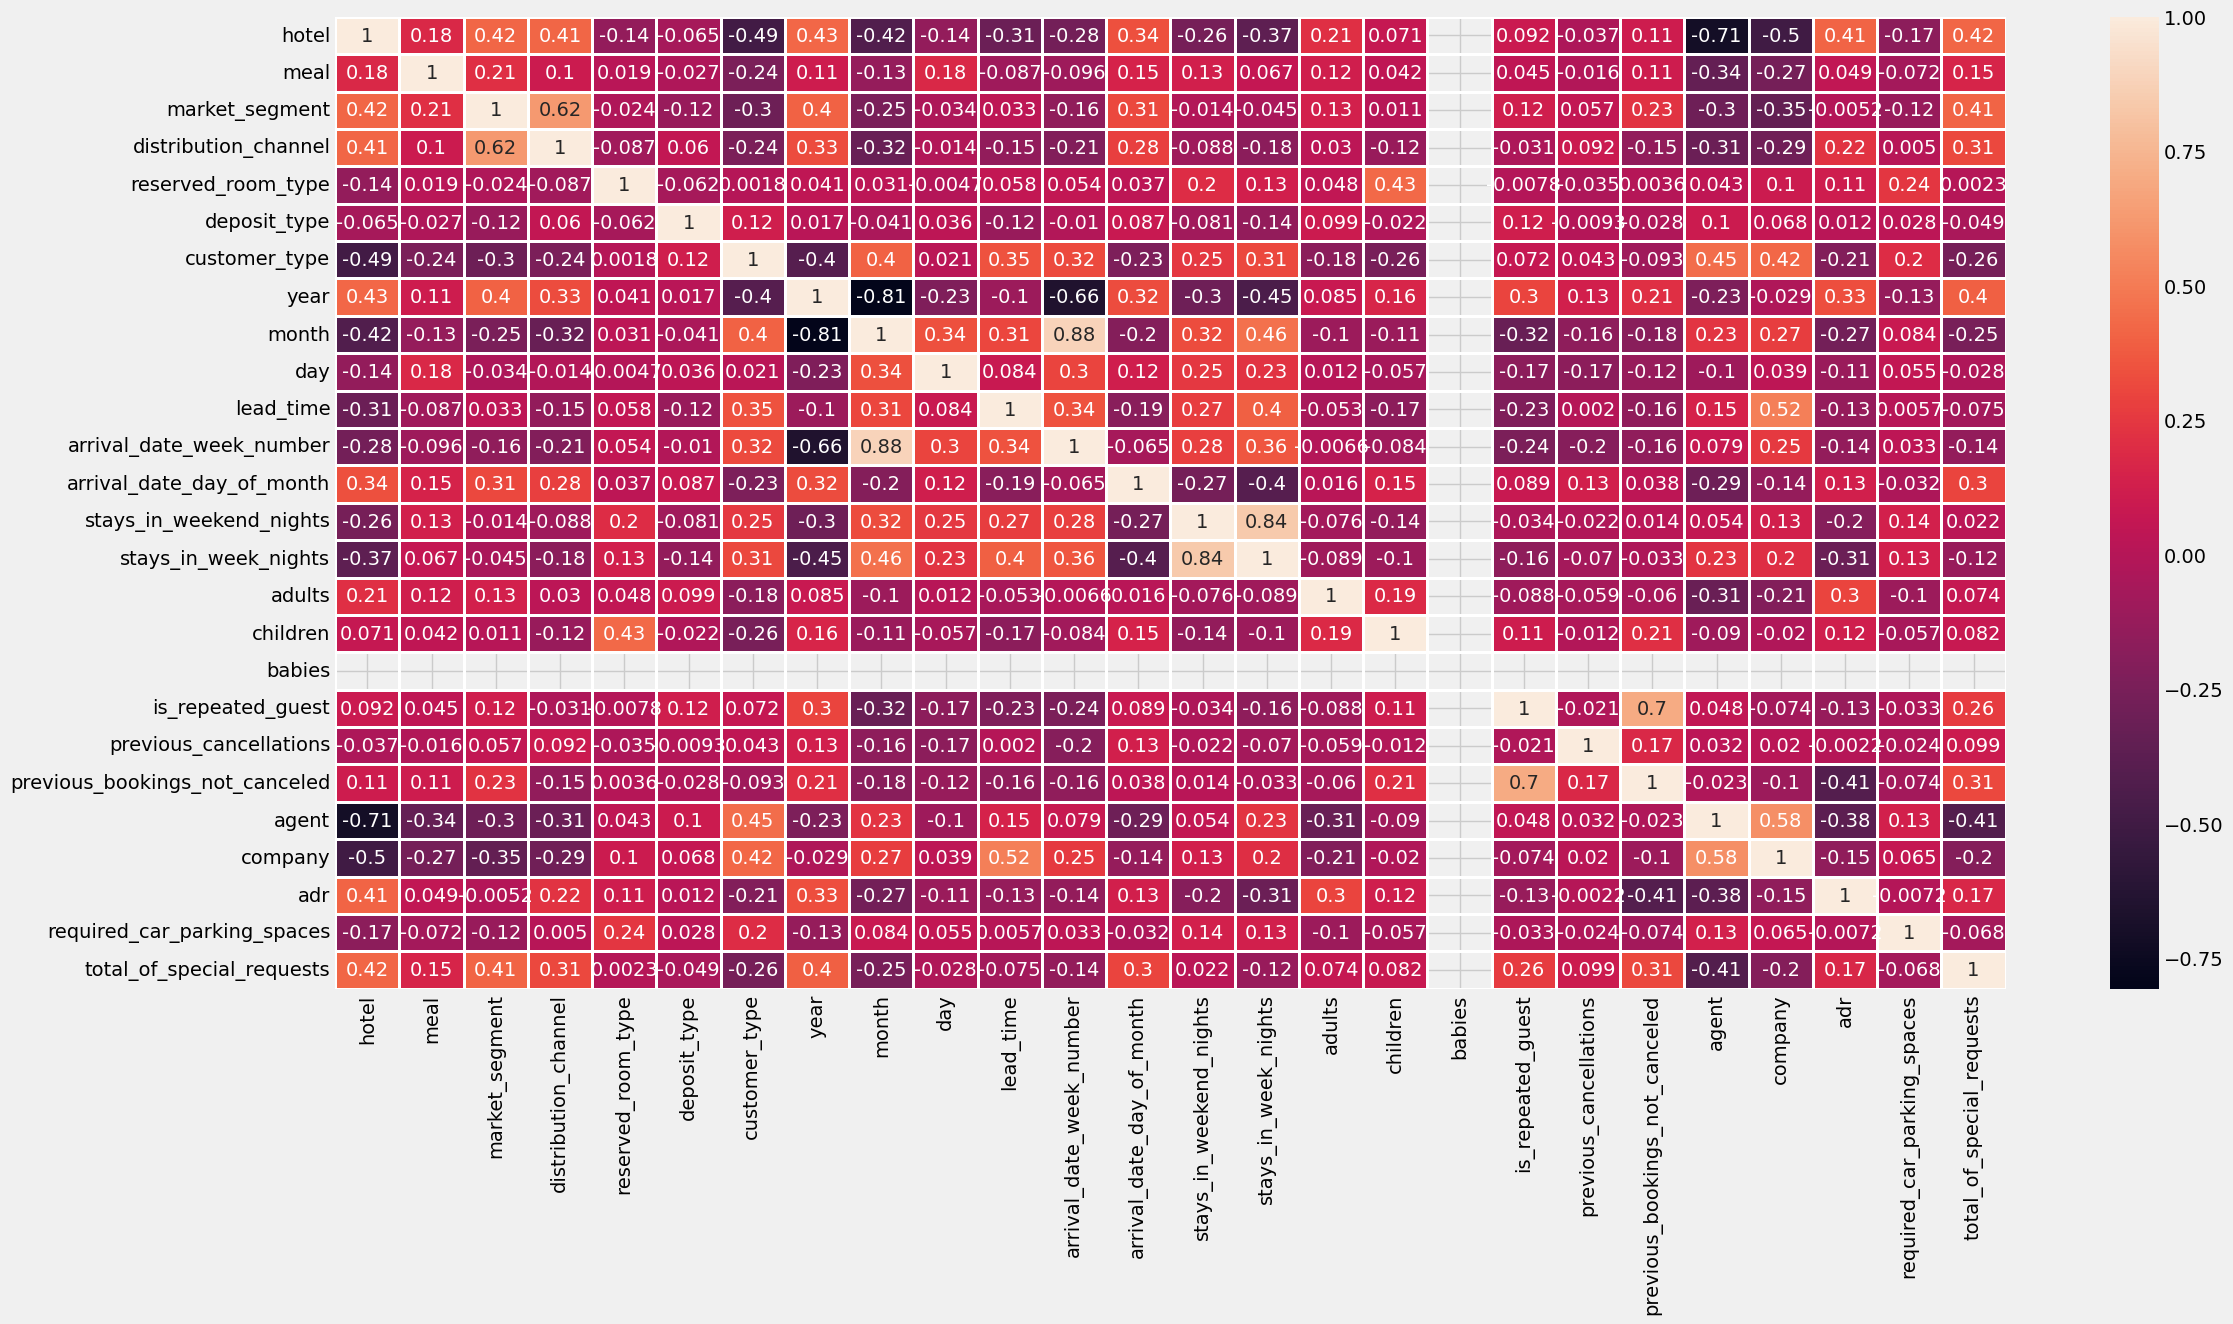

In [ ]:
plt.figure(figsize = (24, 12))

corr = X.corr()

sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
#El código calcula la correlación entre la columna 'is_canceled' de un DataFrame (df)
#y todas las demás columnas numéricas del mismo DataFrame.
#Luego, ordena estos valores de correlación en orden descendente (de mayor a menor)
#y almacena los resultados en una serie llamada correlation.

correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
total_of_special_requests         0.117365
stays_in_weekend_nights           0.116125
required_car_parking_spaces       0.101669
stays_in_week_nights              0.096420
adr                               0.055611
agent                             0.048798
company                           0.044735
adults                            0.027955
children                          0.024697
previous_cancellations            0.022180
is_repeated_guest                 0.018974
previous_bookings_not_canceled    0.017618
lead_time                         0.012807
arrival_date_day_of_month         0.004797
arrival_date_week_number          0.000159
babies                                 NaN
Name: is_canceled, dtype: float64

In [ ]:
X.shape, y.shape

((189, 26), (189,))

In [ ]:
# Dividimos los datos en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

In [ ]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
40966,1,0,2,2,1,0,1,0,8,12,0.693147,3.526361,2.397895,1,1,2,0.0,0,0,0,0,2.302585,2.302585,4.663439,0,1
3049,0,0,1,1,1,0,2,0,11,15,3.091042,3.850148,2.564949,0,3,1,0.0,0,0,0,0,5.814131,5.641907,3.713572,0,0
3057,0,0,1,1,1,0,2,0,11,12,1.386294,3.850148,2.564949,0,3,1,0.0,0,0,0,0,5.814131,5.641907,3.713572,0,0
3064,0,0,1,1,1,0,2,0,11,9,3.737670,3.850148,2.564949,1,3,1,0.0,0,0,0,0,5.225747,5.641907,3.610918,0,0
18248,0,0,1,1,3,0,2,0,11,15,3.583519,3.828641,1.945910,2,7,1,0.0,0,0,0,0,5.225747,5.641907,4.080922,1,0


In [ ]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
18313,0,0,1,1,3,0,2,0,11,17,3.218876,3.806662,3.295837,7,15,1,0.0,0,0,0,0,5.225747,5.641907,4.080922,1,0
2884,0,0,1,1,1,0,2,0,11,16,3.218876,3.828641,1.386294,3,10,1,0.0,0,0,0,0,5.814131,5.641907,3.713572,0,0
18257,0,0,1,1,1,0,2,0,11,15,3.465736,3.828641,1.098612,3,10,1,0.0,0,0,0,0,5.225747,5.641907,3.610918,0,0
2983,0,0,1,1,1,0,2,0,11,9,3.663562,3.850148,2.302585,1,5,1,0.0,0,0,0,0,5.225747,5.641907,3.610918,0,0
43580,1,0,0,0,1,0,0,0,9,21,2.995732,3.688879,3.044522,1,0,2,0.0,0,0,0,0,2.708050,4.442651,4.828314,0,0


In [ ]:
y_train.head(), y_test.head()

(40966    0
 3049     0
 3057     1
 3064     1
 18248    0
 Name: is_canceled, dtype: int64,
 18313    0
 2884     0
 18257    0
 2983     1
 43580    0
 Name: is_canceled, dtype: int64)

# Entrenando el Modelo

## Regresión Logística

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"La precisión de la Regresión Logística es: {acc_lr}")
print(f"Matríz de Confusión: \n{conf}")
print(f"Informe de Clasificación: \n{clf_report}")


La precisión de la Regresión Logística es: 0.8947368421052632
Matríz de Confusión: 
[[51  1]
 [ 5  0]]
Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.00      0.00      0.00         5

    accuracy                           0.89        57
   macro avg       0.46      0.49      0.47        57
weighted avg       0.83      0.89      0.86        57



In [ ]:
!pip install --upgrade numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## KNN

In [ ]:
# Asumiendo que X_train, X_test, y_train, y_test ya están definidos
# Convertir X_test a un arreglo de NumPy si no lo es
if not isinstance(X_test, np.ndarray):
    X_test = np.array(X_test)

# Asegurarse de que X_test esté almacenado de manera contigua en memoria
X_test = np.ascontiguousarray(X_test)

# Verificar las propiedades de X_test
print("Tipo de X_test:", type(X_test))
print("Flags de X_test:", X_test.flags)


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"La precisión de KNN es : {acc_knn}")
print(f"Matríz de Confusión: \n{conf}")
print(f"Informe de Clasificación: \n{clf_report}")


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x797b97ed48b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory
Exception ignored on calling ctypes callback

Tipo de X_test: <class 'numpy.ndarray'>
Flags de X_test:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

La precisión de KNN es : 0.9298245614035088
Matríz de Confusión: 
[[52  0]
 [ 4  1]]
Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.20      0.33         5

    accuracy                           0.93        57
   macro avg       0.96      0.60      0.65        57
weighted avg       0.93      0.93      0.91        57



## Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"La Precisión del Árbol de Decisión es: {acc_dtc}")
print(f"Matríz de Confusión: \n{conf}")
print(f"Informe de Clasificación: \n{clf_report}")

La Precisión del Árbol de Decisión es: 0.9122807017543859
Matríz de Confusión: 
[[50  2]
 [ 3  2]]
Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.50      0.40      0.44         5

    accuracy                           0.91        57
   macro avg       0.72      0.68      0.70        57
weighted avg       0.90      0.91      0.91        57



## Random Forest Classifier

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"La Precisión de Random Forest es : {acc_rd_clf}")
print(f"Matríz de Confusión: \n{conf}")
print(f"Informe de Clasificación: \n{clf_report}")

La Precisión de Random Forest es : 0.9298245614035088
Matríz de Confusión: 
[[52  0]
 [ 4  1]]
Informe de Clasificación: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.20      0.33         5

    accuracy                           0.93        57
   macro avg       0.96      0.60      0.65        57
weighted avg       0.93      0.93      0.91        57



##  Comparación de Modelos

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,0.929825
3,Random Forest Classifier,0.929825
2,Decision Tree Classifier,0.912281
0,Logistic Regression,0.894737


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')